# Introducción

Conjunto de Datos de Préstamos Basado en el Conjunto de Datos de Home Equity de Kaggle
Disponible en: https://www.kaggle.com/ajay1735/hmeq-data

Contexto

El departamento de crédito al consumidor de un banco quiere automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para hacerlo, seguirán las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de puntuación crediticia empíricamente derivado y estadísticamente sólido. El modelo se basará en datos recopilados de solicitantes recientes a los que se les concedió crédito mediante el proceso actual de evaluación de préstamos. El modelo se construirá utilizando herramientas de modelado predictivo, pero debe ser lo suficientemente interpretable como para proporcionar una razón para cualquier acción adversa (rechazos).

Contenido

El conjunto de datos de Home Equity (HMEQ) contiene información básica y de rendimiento de préstamos para 5,960 préstamos con garantía hipotecaria recientes. El objetivo (BAD) es una variable binaria que indica si un solicitante finalmente incumplió o tuvo un retraso serio en el pago. Este resultado adverso ocurrió en 1,189 casos (20%). Para cada solicitante, se registraron 12 variables de entrada.

Atributos
TARGET: Etiqueta: 1 = el cliente incumplió con el préstamo, 0 = el préstamo fue pagado

LOAN: Monto de la solicitud del préstamo

MORTDUE: Monto adeudado en la hipoteca existente

VALUE: Valor de la propiedad actual

YOJ: Años en el trabajo actual

DEROG: Número de informes de incumplimiento grave

DELINQ: Número de líneas de crédito morosas

CLAGE: Edad de la línea de crédito más antigua en meses

NINQ: Número de líneas de crédito recientes

CLNO: Número de líneas de crédito

DEBTINC: Relación deuda-ingreso







# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [219]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

¿De qué se trata el conjunto de datos?

El conjunto de datos se trata de información sobre préstamos con garantía hipotecaria otorgados recientemente. El objetivo es utilizar esta información para automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Esto se logrará creando un modelo de puntuación crediticia basado en datos empíricos y estadísticamente sólidos. El conjunto de datos incluye información básica y de rendimiento de los préstamos para 5,960 casos recientes, de los cuales 1,189 (20%) tuvieron un resultado adverso (incumplimiento o retraso grave en el pago).

¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo que hay que predecir es TARGET. Esta variable es binaria y tiene los siguientes significados:

1: El cliente incumplió con el préstamo.
0: El préstamo fue pagado.


¿Qué información (atributos) hay disponible para hacer la predicción?


Los atributos disponibles para hacer la predicción son los siguientes:

LOAN: Monto de la solicitud del préstamo.

MORTDUE: Monto adeudado en la hipoteca existente.

VALUE: Valor de la propiedad actual.

YOJ: Años en el trabajo actual.

DEROG: Número de informes de incumplimiento grave.

DELINQ: Número de líneas de crédito morosas.

CLAGE: Edad de la línea de crédito más antigua en meses.

NINQ: Número de líneas de crédito recientes.

CLNO: Número de líneas de crédito.

DEBTINC: Relación deuda-ingreso.

¿Qué atributos imagina ud. que son los más determinantes para la predicción?


Es probable que los atributos más determinantes para la predicción sean aquellos que reflejan el historial crediticio y la capacidad de pago del solicitante. Algunos de los atributos más relevantes podrían ser:

DEBTINC (Relación deuda-ingreso): Un alto valor en esta relación podría indicar que el solicitante tiene una gran carga de deuda en comparación con sus ingresos, lo que podría aumentar el riesgo de incumplimiento.


DEROG (Número de informes de incumplimiento grave): Un mayor número de informes de incumplimiento grave sugiere un historial crediticio negativo, lo que probablemente aumente el riesgo de incumplimiento.

DELINQ (Número de líneas de crédito morosas): Un mayor número de líneas de crédito morosas indica problemas actuales en el pago de deudas, lo que también aumenta el riesgo de incumplimiento.

MORTDUE (Monto adeudado en la hipoteca existente): Un monto elevado podría sugerir una gran carga financiera adicional.

CLAGE (Edad de la línea de crédito más antigua en meses): Una mayor edad de la línea de crédito más antigua podría indicar un historial crediticio más largo y potencialmente más estable.

VALUE (Valor de la propiedad actual): Un valor alto de la propiedad podría ofrecer más garantía en caso de incumplimiento, reduciendo el riesgo percibido.

# Ejercicio 2

## Carga de datos

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [220]:
#dataset = pd.read_csv("./data/loan_data.csv", comment="#")
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")


# Parámetros por defecto

In [221]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

features = X.columns
features

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

In [222]:
#Select features
#desired_features = ['DEBTINC', 'LOAN',]
desired_features = X.columns
X = X[desired_features]

In [223]:
# división entre train y test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, shuffle=True)

In [224]:
# Standarize training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
mean, std = scaler.mean_ , scaler.scale_


<span style="color:red">**El código anterior y el siguiente se pueden resumir en el siguiente código:**</span>

```python
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Usar el scaler ajustado para transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Ahora X_train_scaled y X_test_scaled están estandarizados



In [225]:
# Standarize test data using the mean/std computed before
X_test_standarized = X_test.values
for i in range(len(mean)):
  X_test_standarized[:, i] = (X_test.values[:, i] - mean[i])/std[i]

X_test = X_test_standarized

In [226]:
print(np.shape(X_train))
print(np.shape(y_train.values))

(1668, 10)
(1668,)


In [227]:
# Training set classes are unbalanced. Perform an Undersampling
#print(y_train.value_counts())
#from imblearn.under_sampling import RandomUnderSampler
#from sklearn.model_selection import train_test_split
#
#undersampler = RandomUnderSampler(random_state = 10)
#X_train, y_train = undersampler.fit_resample(X_train, y_train)
#print(y_train.value_counts())

In [228]:
## Fit model
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=10) # loss=hinge by default (is using a SVM)
#clf.fit(X_train,y_train)

<span style="color:red">**¿Por que recurren al metodo partial fit?:**</span>

**Respuesta del grupo**

Se recurre a este método para poder tener más control sobre el loop de entrenamiento y así ir construyendo las curvas de error en cada época.

In [229]:
# Training the model using partial_fit and recording the loss
from sklearn.metrics import hinge_loss
n_epochs = 500
loss_train_list, loss_test_list = [], []
for epoch in range(n_epochs):
    clf.partial_fit(X_train, y_train.values,  classes=np.unique(y_train.values))

    pred_decision_test = clf.decision_function(X_test) #decision_function me devuelve algo proporcional a la distancia del hiperplano que separa las clases
    pred_decision_train = clf.decision_function(X_train)

    loss_test = hinge_loss(y_test.values, pred_decision_test)
    loss_train = hinge_loss(y_train.values, pred_decision_train)

    loss_test_list.append(loss_test)
    loss_train_list.append(loss_train)


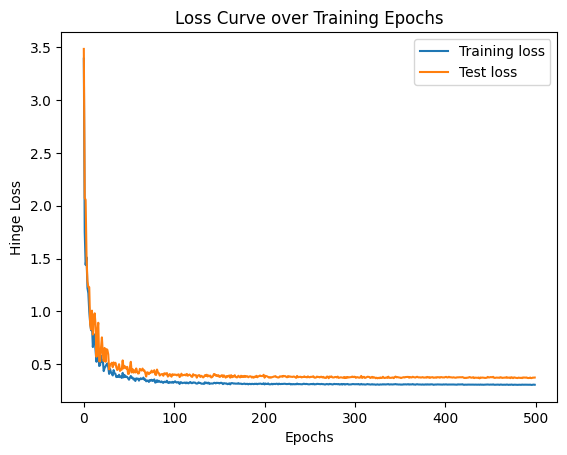

In [230]:
# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(range(n_epochs), loss_train_list, label='Training loss')
plt.plot(range(n_epochs), loss_test_list, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Hinge Loss')
plt.title('Loss Curve over Training Epochs')
plt.legend()
plt.show()

In [231]:
# Predict
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

<span style="color:red">**Observen como cambia el F1 cuando se agrega  el parámetro average="weighted".  Este parámetro se utiliza en las funciones de evaluación de scikit-learn  para calcular las métricas de clasificación de manera ponderada según el soporte (número de instancias verdaderas) de cada clase. Esto es especialmente útil cuando se trabaja con conjuntos de datos desbalanceados.**</span>

In [232]:
# Compute evaluation metrics
from sklearn import metrics
print("Métricas del entrenamiento:")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Precision: ", metrics.precision_score(y_train, y_pred_train))
print("Recall: ", metrics.recall_score(y_train, y_pred_train))
print("F1: ", metrics.f1_score(y_train, y_pred_train))
print("F1 weighted: ", metrics.f1_score(y_train, y_pred_train, average="weighted"))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred_train))

print("\nMétricas del testset:")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Precision: ", metrics.precision_score(y_test, y_pred_test))
print("Recall: ", metrics.recall_score(y_test, y_pred_test))
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("F1 weighted: ", metrics.f1_score(y_test, y_pred_test, average='weighted'))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_test))

Métricas del entrenamiento:
Accuracy:  0.8657074340527577
Precision:  0.77
Recall:  0.27697841726618705
F1:  0.4074074074074074
F1 weighted:  0.8381288658502992
Confusion Matrix: 
 [[1367   23]
 [ 201   77]]

Métricas del testset:
Accuracy:  0.8548387096774194
Precision:  0.7
Recall:  0.22580645161290322
F1:  0.3414634146341463
F1 weighted:  0.8222680716233145
Confusion Matrix: 
 [[152   3]
 [ 24   7]]


# Modelo con ajuste de hiperparámetros

In [233]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

features = X.columns
features

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

In [234]:
#Select features
#desired_features = ['DEBTINC', 'LOAN',]
desired_features = X.columns
X = X[desired_features]

In [235]:
# división entre train/validacion y test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, shuffle=True)

In [236]:
from sklearn.model_selection import KFold   ## Sklearn kfold
folds = 5
splits=KFold(n_splits=folds,shuffle=True,random_state=10)

In [237]:
# Merge training data into one DataFrame
data = X_train.join(y_train)
data

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,TARGET
212,6900,51384.0,84689.0,4.0,0.0,0.0,224.247037,3.0,29.0,30.526151,0
1688,15500,57993.0,82248.0,10.0,0.0,0.0,173.072969,0.0,16.0,32.142469,1
1674,14500,38986.0,49970.0,1.0,8.0,1.0,220.917262,0.0,17.0,47.914521,1
1603,9100,28550.0,40300.0,5.0,0.0,0.0,109.535636,7.0,33.0,23.082905,1
829,22400,89985.0,121601.0,11.0,0.0,0.0,111.982420,2.0,24.0,30.991174,0
...,...,...,...,...,...,...,...,...,...,...,...
1393,11300,124205.0,196124.0,0.0,0.0,1.0,332.723390,0.0,15.0,40.120168,0
1344,15400,10074.0,57135.0,4.0,0.0,0.0,310.366757,0.0,16.0,17.601206,0
527,24700,53925.0,83056.0,4.0,0.0,0.0,251.188393,2.0,25.0,34.889242,0
1149,14000,99652.0,113012.0,17.0,1.0,0.0,255.961428,0.0,16.0,35.453810,0


In [238]:
# Define grids
grid_regularization_method = ['l1', 'l2'] #penalty
grid_regularization = [0.0001, 0.001, 0.01, 0.1] # alpha
grid_loss = ['hinge', 'log_loss', 'perceptron']
grid_learning_rate_method = ['constant', 'adaptive']
grid_learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.5] #eta0


In [239]:
# Define list to save data
df_crossval = []
models = {}
model_id = 0
warning_count = 0
# Grid Search loop
for regularization_method in grid_regularization_method:
  for regularization in grid_regularization:
    for loss in grid_loss:
      for learning_rate_method in grid_learning_rate_method:
        for learning_rate in grid_learning_rate:

          sum_val_metrics = {'Accuracy': 0, 'Recall': 0, 'Precision': 0, 'F1': 0}
          fold_val_metrics = {'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': []}

          for fold, (train_idx, val_idx) in enumerate(splits.split(data)):
            X_train, y_train = data.iloc[train_idx][desired_features],  data.iloc[train_idx].TARGET
            X_val, y_val = data.iloc[val_idx][desired_features], data.iloc[val_idx].TARGET

            # Scale data
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            mean, std = scaler.mean_ , scaler.scale_

            # Standarize validation data using the mean/std of train
            X_val_standarized = X_val.values
            for i in range(len(mean)):
              X_val_standarized[:, i] = (X_val.values[:, i] - mean[i])/std[i]

            X_val = X_val_standarized


            clf = SGDClassifier(loss=loss,
                                penalty=regularization_method,
                                alpha=regularization,
                                learning_rate=learning_rate_method,
                                eta0=learning_rate,
                                random_state=10,
                                #max_iter=20 #BORRAR!!!!!!
                                )

            clf.fit(X_train, y_train)

            # Predict
            y_pred_train = clf.predict(X_train)
            y_pred_val= clf.predict(X_val)

            if len(set(y_val) - set(y_pred_val))>0:
              warning_count += 1
             # print(set(y_val) - set(y_pred_val), fold)
             # print(y_val)
             # print()
             # print(y_pred_val)
             # input()
            #print(set(y_val) - set(y_pred_val))

            # Compute metrics
            val_acc = metrics.accuracy_score(y_val, y_pred_val)
            val_rec = metrics.recall_score(y_val, y_pred_val)
            val_prec = metrics.precision_score(y_val, y_pred_val)
            val_f1 = metrics.f1_score(y_val, y_pred_val)

            # Append to metrics dict
            fold_val_metrics['Accuracy'].append(val_acc)
            fold_val_metrics['Recall'].append(val_rec)
            fold_val_metrics['Precision'].append(val_prec)
            fold_val_metrics['F1'].append(val_f1)

          # --------- End of folds loop --------
          # Average metrics over each fold
          for k, v  in fold_val_metrics.items():
            sum_val_metrics[k] = sum(v)/folds

          # Append data
          df_crossval.append([model_id,
                              regularization_method,
                              regularization,
                              loss,
                              learning_rate_method,
                              learning_rate] + list(sum_val_metrics.values()) )
          # Save model
          models[model_id] = clf
          model_id += 1







            ## Compute evaluation metrics
            #print(f'Fold: {fold}')
            #print("Métricas del training set:")
            #print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
            #print("Precision: ", metrics.precision_score(y_train, y_pred_train))
            #print("Recall: ", metrics.recall_score(y_train, y_pred_train))
            #print("F1: ", metrics.f1_score(y_train, y_pred_train))
            #print("Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred_train))
#
            #print("\nMétricas del validation set:")
            #print("Accuracy: ", metrics.accuracy_score(y_val, y_pred_val))
            #print("Precision: ", metrics.precision_score(y_val, y_pred_val))
            #print("Recall: ", metrics.recall_score(y_val, y_pred_val))
            #print("F1: ", metrics.f1_score(y_val, y_pred_val))
            #print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, y_pred_val))



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [240]:
warning_count

130

In [241]:
# Create DataFrame
columnns_names=['Model ID',
                'Regularization method',
                'Regularization constant',
                'Loss',
                'Learning rate method',
                'Initial Learning rate',
                'Validation Accuracy',
                'Validation Recall',
                'Validation Precision',
                'Validation F1']


df_cross_errors=pd.DataFrame(df_crossval,columns=columnns_names)


In [242]:
df_cross_errors

,Model ID,Regularization method,Regularization constant,Loss,Learning rate method,Initial Learning rate,Validation Accuracy,Validation Recall,Validation Precision,Validation F1
0,0,l1,0.0001,hinge,constant,0.0001,0.862123,0.195585,0.899950,0.319031
1,1,l1,0.0001,hinge,constant,0.0010,0.868711,0.232810,0.914365,0.366957
2,2,l1,0.0001,hinge,constant,0.0100,0.875307,0.296860,0.868980,0.440080
3,3,l1,0.0001,hinge,constant,0.1000,0.861522,0.364128,0.716207,0.460757
4,4,l1,0.0001,hinge,constant,0.5000,0.816509,0.418994,0.515071,0.431223
...,...,...,...,...,...,...,...,...,...,...
235,235,l2,0.1000,perceptron,adaptive,0.0001,0.814107,0.410727,0.523754,0.418626
236,236,l2,0.1000,perceptron,adaptive,0.0010,0.811717,0.426760,0.465300,0.437467
237,237,l2,0.1000,perceptron,adaptive,0.0100,0.838120,0.302191,0.479387,0.356394
238,238,l2,0.1000,perceptron,adaptive,0.1000,0.803366,0.439279,0.420597,0.425829


In [243]:
# Model that maximizes Accuracy
best_acc = df_cross_errors['Validation Accuracy'].max()
best_acc_model = df_cross_errors[df_cross_errors['Validation Accuracy'] == best_acc]

# Model that maximizes Recall
best_rec = df_cross_errors['Validation Recall'].max()
best_rec_model = df_cross_errors[df_cross_errors['Validation Recall'] == best_rec]

# Model that maximizes Precision
best_prec = df_cross_errors['Validation Precision'].max()
best_prec_model = df_cross_errors[df_cross_errors['Validation Precision'] == best_prec]
if len(best_prec_model) > 1:
  best_prec_model_best_acc = best_prec_model['Validation Accuracy'].max()
  best_prec_model = best_prec_model[best_prec_model['Validation Accuracy'] == best_prec_model_best_acc]
  if len(best_prec_model) > 1:
    best_prec_model_best_rec = best_prec_model['Validation Recall'].max()
    best_prec_model = best_prec_model[best_prec_model['Validation Recall'] == best_prec_model_best_rec]
    if len(best_prec_model)>1:
      # Pick the one with bigger learning_rate (faster SGD convergence)
      best_prec_model_max_learning_rate = best_prec_model['Initial Learning rate'].max()
      best_prec_model = best_prec_model[best_prec_model['Initial Learning rate'] == best_prec_model_max_learning_rate ]
      if len(best_prec_model)>1:
        # Just pick the first one
        best_prec_model = pd.DataFrame(best_prec_model.iloc[0])


# Model that maximizes F1
best_f1 = df_cross_errors['Validation F1'].max()
best_f1_model = df_cross_errors[df_cross_errors['Validation F1'] == best_f1]



In [244]:
# Compare best models
best_acc_model

,Model ID,Regularization method,Regularization constant,Loss,Learning rate method,Initial Learning rate,Validation Accuracy,Validation Recall,Validation Precision,Validation F1
43,43,l1,0.001,log_loss,constant,0.1,0.876512,0.360979,0.805635,0.490312


In [245]:
best_rec_model

,Model ID,Regularization method,Regularization constant,Loss,Learning rate method,Initial Learning rate,Validation Accuracy,Validation Recall,Validation Precision,Validation F1
53,53,l1,0.001,perceptron,constant,0.1,0.771581,0.517066,0.406901,0.435198


In [246]:
best_prec_model

,221
Model ID,221
Regularization method,l2
Regularization constant,0.1
Loss,log_loss
Learning rate method,constant
Initial Learning rate,0.001
Validation Accuracy,0.860923
Validation Recall,0.177442
Validation Precision,0.941818
Validation F1,0.295995


In [247]:
best_f1_model

,Model ID,Regularization method,Regularization constant,Loss,Learning rate method,Initial Learning rate,Validation Accuracy,Validation Recall,Validation Precision,Validation F1
145,145,l2,0.0001,perceptron,adaptive,0.0001,0.838688,0.4813,0.603925,0.50154


In [248]:
# Evaluate best model using test set
### Note: I'm assuming that the most important metric is accuracy
print(best_f1_model['Model ID'].iloc[0])
final_model = models[best_f1_model['Model ID'].iloc[0]]


y_test_predict = final_model.predict(X_test)


# Compute metrics
test_acc = metrics.accuracy_score(y_test, y_test_predict)
test_rec = metrics.recall_score(y_test, y_test_predict)
test_prec = metrics.precision_score(y_test, y_test_predict)
test_f1 = metrics.f1_score(y_test, y_test_predict)

# Final model test metrics
print(f'Test accuracy: {test_acc}')
print(f'Test recall: {test_rec}')
print(f'Test precision: {test_prec}')
print(f'Test F1 score: {test_f1}')
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_test_predict))


145
Test accuracy: 0.8010752688172043
Test recall: 0.06451612903225806
Test precision: 0.2
Test F1 score: 0.0975609756097561
Confusion Matrix: 
 [[147   8]
 [ 29   2]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


<span style="color:red">** ¿Conclusión: Mejora o no el modelo con el ajuste de herparámetros?**</span>

Trás el ajuste de hiperparámetros, la perfomance del modelo parece disminuir respecto al modelo entrenado sin ajuste. Pero cabe recordar que la metodología realizada para el ajuste de hiperparámetros (5-fold CV y luego evaluado en un conjunto de test) es más robusta que la realizada anteriormente (unicamente con un train-test split). Por lo tanto, podría esperarse que la capacidad predictiva del modelo ajustado sea mayor ante nuevos datos en comparación al modelo sin ajuste de hiperparámetros.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

In [167]:
y.value_counts() # Los datos están desbalanceados así que vamos a hacer un undersampling

TARGET
0    1545
1     309
Name: count, dtype: int64

------

**Corrección de la docente**

<span style="color:red"> Al balancear los datos, no es posible comparar directamente el rendimiento del árbol de decisión con el clasificador lineal ajustado anteriormente. El balanceo se realiza para corregir el desbalance en la distribución de clases, lo que puede mejorar el desempeño del modelo en la clase minoritaria. Sin embargo, para evaluar correctamente el impacto del balanceo, es esencial analizar el rendimiento del modelo sin balancear primero. Es recomendable ajustar los parámetros de evaluación y utilizar métricas que reflejen adecuadamente el rendimiento en el conjunto de datos específico, garantizando así una comparación justa entre diferentes modelos y estrategias. </span>



<span style="color:red">¿Es Correcto Cómo se Remuestrea?
El código es correcto y cumple con el propósito de balancear las clases antes de dividir los datos en conjuntos de entrenamiento y prueba. Sin embargo, tengan en cuenta los siguientes puntos:
Balanceo Antes de la División: Al balancear los datos antes de la división, aseguras que tanto el conjunto de entrenamiento como el de prueba estén balanceados. Esto puede ser útil si quieres evaluar el modelo en un conjunto de datos balanceado.
Distribución Real: Este enfoque puede no reflejar la distribución real de clases en datos no balanceados. En escenarios de producción, los datos pueden seguir desbalanceados, lo cual podría afectar el rendimiento del modelo entrenado en datos balanceados.
Alternativa: División Antes del Balanceo
Otra forma de abordar el balanceo es dividir los datos en conjuntos de entrenamiento y prueba primero, y luego aplicar el submuestreo solo al conjunto de entrenamiento. Esto puede ser más representativo de escenarios reales donde el modelo debe lidiar con datos desbalanceados en producción.
Ventajas de la Alternativa
Conjunto de Prueba Representativo: El conjunto de prueba mantiene la distribución original de las clases, lo que proporciona una evaluación más realista del rendimiento del modelo.
Entrenamiento Balanceado: El conjunto de entrenamiento balanceado mejora el aprendizaje del modelo, especialmente para la clase minoritaria.
Conclusión
Ambos enfoques son válidos y la elección depende del objetivo y del escenario específico. Balancear antes de dividir asegura que tanto entrenamiento como prueba estén balanceados, mientras que balancear después de dividir proporciona una evaluación más realista y puede ser preferido en escenarios de producción.</span>

**Respuesta del grupo**

Decidimos balancear las clases para que el árbol clasifique mejor la clase minoritaria. Con todo desbalanceado, el accuracy es más alto, pero esto es porque el modelo aprende un sesgo hacia la clase mayoritaria (que también es mayoritaria en el testset). En cambio, el F1 ronda el 60%. Cuando balanceamos trainset y testset, la accuracy baja pero el F1 se incrementa, dando cuenta de una mejor calidad en la predicción.

## Datos desbalanceados

In [168]:
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X, y, test_size=0.2, random_state=0)
imbalanced_clf = DecisionTreeClassifier(random_state=0)
imbalanced_clf = clf.fit(X_train_imbalanced, y_train_imbalanced)
y_pred_train = imbalanced_clf.predict(X_train_imbalanced)
y_pred_test_imbalanced = imbalanced_clf.predict(X_test_imbalanced)

In [169]:
print("Métricas del entrenamiento:")
print("Accuracy: ", metrics.accuracy_score(y_train_imbalanced, y_pred_train))
print("Precision: ", metrics.precision_score(y_train_imbalanced, y_pred_train))
print("Recall: ", metrics.recall_score(y_train_imbalanced, y_pred_train))
print("F1: ", metrics.f1_score(y_train_imbalanced, y_pred_train))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_train_imbalanced, y_pred_train))

print("\nMétricas del testset:")
print("Accuracy: ", metrics.accuracy_score(y_test_imbalanced, y_pred_test_imbalanced))
print("Precision: ", metrics.precision_score(y_test_imbalanced, y_pred_test_imbalanced))
print("Recall: ", metrics.recall_score(y_test_imbalanced, y_pred_test_imbalanced))
print("F1: ", metrics.f1_score(y_test_imbalanced, y_pred_test_imbalanced))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test_imbalanced, y_pred_test_imbalanced))

Métricas del entrenamiento:
Accuracy:  0.8280512474713418
Precision:  0.46774193548387094
Recall:  0.11553784860557768
F1:  0.1853035143769968
Confusion Matrix: 
 [[1199   33]
 [ 222   29]]

Métricas del testset:
Accuracy:  0.8490566037735849
Precision:  0.625
Recall:  0.08620689655172414
F1:  0.15151515151515152
Confusion Matrix: 
 [[310   3]
 [ 53   5]]


## Datos balanceados

In [170]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

undersampler = RandomUnderSampler(random_state = 0)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [171]:
y_train.value_counts()

TARGET
0    249
1    245
Name: count, dtype: int64

In [172]:
from sklearn.tree import DecisionTreeClassifier
balanced_clf = DecisionTreeClassifier(random_state=0)
balanced_clf = balanced_clf.fit(X_train, y_train)

In [173]:
from sklearn import metrics

y_pred_train = balanced_clf.predict(X_train)
y_pred_test = balanced_clf.predict(X_test)

In [174]:
print("Métricas del entrenamiento:")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Precision: ", metrics.precision_score(y_train, y_pred_train))
print("Recall: ", metrics.recall_score(y_train, y_pred_train))
print("F1: ", metrics.f1_score(y_train, y_pred_train))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred_train))

print("\nMétricas del testset:")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Precision: ", metrics.precision_score(y_test, y_pred_test))
print("Recall: ", metrics.recall_score(y_test, y_pred_test))
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_test))

Métricas del entrenamiento:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Confusion Matrix: 
 [[249   0]
 [  0 245]]

Métricas del testset:
Accuracy:  0.6532258064516129
Precision:  0.6721311475409836
Recall:  0.640625
F1:  0.6559999999999999
Confusion Matrix: 
 [[40 20]
 [23 41]]


**Respuesta del grupo a la corrección**

La accuracy baja del 88% al 65%, pero el F1 pasa de 0,62 a 0,65. Además, mejoran al mismo tiempo la precision y el recall.

¿Qué pasa si predecimos con el modelo balanceado un testest desbalanceado? Tomemos todas las muestras con las que NO entrenamos el modelo.

In [175]:
train_indexes = X_train.index
X_test_imb_v2 = X[~X.index.isin(train_indexes)]
y_test_imb_v2 = y[~y.index.isin(train_indexes)]

In [176]:
y_pred_test = balanced_clf.predict(X_test_imb_v2)

print("\nMétricas del testset:")
print("Accuracy: ", metrics.accuracy_score(y_test_imb_v2, y_pred_test))
print("Precision: ", metrics.precision_score(y_test_imb_v2, y_pred_test))
print("Recall: ", metrics.recall_score(y_test_imb_v2, y_pred_test))
print("F1: ", metrics.f1_score(y_test_imb_v2, y_pred_test))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test_imb_v2, y_pred_test))


Métricas del testset:
Accuracy:  0.8154411764705882
Precision:  0.556420233463035
Recall:  0.9255663430420712
F1:  0.69501822600243
Confusion Matrix: 
 [[823 228]
 [ 23 286]]


Notemos que baja el accuracy porque baja la precision, dado que tenemos muchos falsos positivos para la clase minoritaria. Esto sucede porque el modelo se entrenó con datos balanceados y ya no tiene un sesgo hacia la clase mayoritaria; sin embargo, el testset sí está desbalanceado. Sin embargo, el F1 sigue siendo superior al del modelo desbalanceado.

**Fin de las respuestas a la corrección**
____

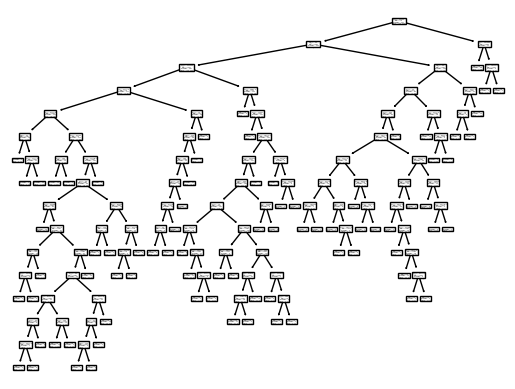

In [178]:
from sklearn.tree import plot_tree

plot_tree(balanced_clf); # Por defecto, "nodes are expanded until all leaves
                # are pure or until all leaves contain less than min_samples_split samples"
                # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [179]:
balanced_clf.get_depth() # Vemos que sklearn ajusta automáticamente un modelo con depth = 15

15

In [180]:
balanced_clf.get_depth() # Vemos que sklearn ajusta automáticamente un modelo con depth = 15

15

# Ajuste de hiperparámetros

In [181]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10, 15, 50, 100, 150],
    'min_samples_leaf': [10, 50, 100]
}

In [182]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train) # No vamos a usar todo el dataset, sino que vamos a sacar la validación del training set
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score').head(10)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
33,entropy,10,10,0.728695,0.044758,1
36,entropy,15,10,0.728695,0.044758,1
45,entropy,150,10,0.728695,0.044758,1
39,entropy,50,10,0.728695,0.044758,1
42,entropy,100,10,0.728695,0.044758,1
15,gini,50,10,0.720552,0.038373,6
18,gini,100,10,0.720552,0.038373,6
9,gini,10,10,0.720552,0.038373,6
21,gini,150,10,0.720552,0.038373,6
12,gini,15,10,0.720552,0.038373,6


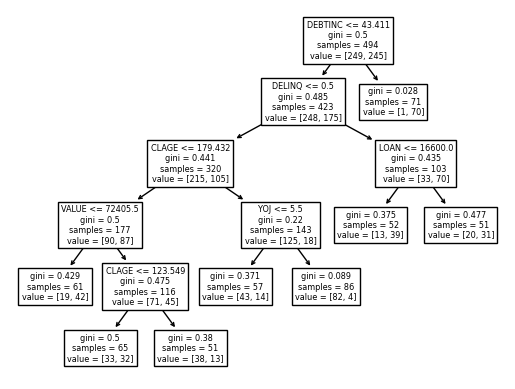

In [183]:
# Dado que hay varios modelos compartiendo el primer puesto,
# podemos elegir el más simple de todos ellos
# criterion = 'gini', max_depth = 5, min_samples_leaf = 50

# TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
# LOAN    Amount of the loan request
# MORTDUE Amount due on existing mortgage
# VALUE   Value of current property
# YOJ     Years at present job
# DEROG   Number of major derogatory reports
# DELINQ  Number of delinquent credit lines
# CLAGE   Age of oldest trade line in months
# NINQ    Number of recent credit lines
# CLNO    Number of credit lines
# DEBTINC Debt-to-income ratio

# El mejor modelo usa las variables DEBTINC, DELINQ, CLAGE, LOAN y YOJ

best_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 50, random_state = 0)
best_model.fit(X_train, y_train)
from sklearn.tree import plot_tree

plot_tree(best_model, feature_names = X.columns);

In [184]:
# De la documentación de sklearn: "The importance of a feature
# is computed as the (normalized) total reduction of the criterion
# brought by that feature. It is also known as the Gini importance."

pd.DataFrame(best_model.feature_importances_, columns = ['importance'], index=X.columns).sort_values(by='importance', ascending = False)

,importance
DEBTINC,0.421643
CLAGE,0.258127
DELINQ,0.203909
VALUE,0.076515
YOJ,0.028785
LOAN,0.011022
MORTDUE,0.000000
DEROG,0.000000
NINQ,0.000000
CLNO,0.000000


In [185]:
y_train_test = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Métricas del entrenamiento:")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Precision: ", metrics.precision_score(y_train, y_pred_train))
print("Recall: ", metrics.recall_score(y_train, y_pred_train))
print("F1: ", metrics.f1_score(y_train, y_pred_train))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred_train))

print("\nMétricas del testset:")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Precision: ", metrics.precision_score(y_test, y_pred_test))
print("Recall: ", metrics.recall_score(y_test, y_pred_test))
print("F1: ", metrics.f1_score(y_test, y_pred_test))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred_test))

# La accuracy es semejante a la que obteníamos con el dataset de validación,
# pero da un poco peor que con el modelo ajustado con los parámetros por defecto

Métricas del entrenamiento:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Confusion Matrix: 
 [[249   0]
 [  0 245]]

Métricas del testset:
Accuracy:  0.6854838709677419
Precision:  0.6923076923076923
Recall:  0.703125
F1:  0.6976744186046512
Confusion Matrix: 
 [[40 20]
 [19 45]]


<span style="color:red">** ¿Conclusión: Mejora o no el modelo con el ajuste de herparámetros?**</span>

Tras el ajuste de hiperparámetros, tanto la accuracy como el recall,  la precision y el F1 del modelo aumentan levemente respecto al modelo con hiperparámetros por defecto.